**Exercise 7.1:** 

In this exercise, we will make a least squares model for a case where we have several
variables which may be correlated.
The file [bloodpress.txt](Data/bloodpress.txt) ('Data/bloodpress.txt') contains data about 20 individuals with high blood pressure.
The data columns present in the file are given in table 1.


| Column | Description              |             Unit |
|:-------|:-------------------------|-----------------:|
| Pt     | Label for person         |              --- |
| BP     | Blood pressure           |             mmHg |
| Age    | Age                      |            years |
| Weight | Weight                   |               kg |
| BSA    | Body surface area        |            m$^2$ |
| DUR    | Duration of hypertension |            years |
| Pulse  | Basal heart rate         | beats per minute |
| Stress | Stress index             |              --- |
||**Table 1:** *Data columns present in the file [bloodpress.txt](Data/bloodpress.txt)*|


**(a)** Begin by exploring the data. Plot pairs of variables against each other
to visually inspect which variables might be correlated. Based on your plots, which pairs
of variables seem to be correlated?

In [1]:
# Imports
import pandas as pd # To read the data
import matplotlib.pyplot as plt # For plotting
from matplotlib.gridspec import GridSpec # For making a plotting grid
import itertools as itt # For combinations
from math import ceil # To round to the higer integer
import numpy as np #For matrix manipulation

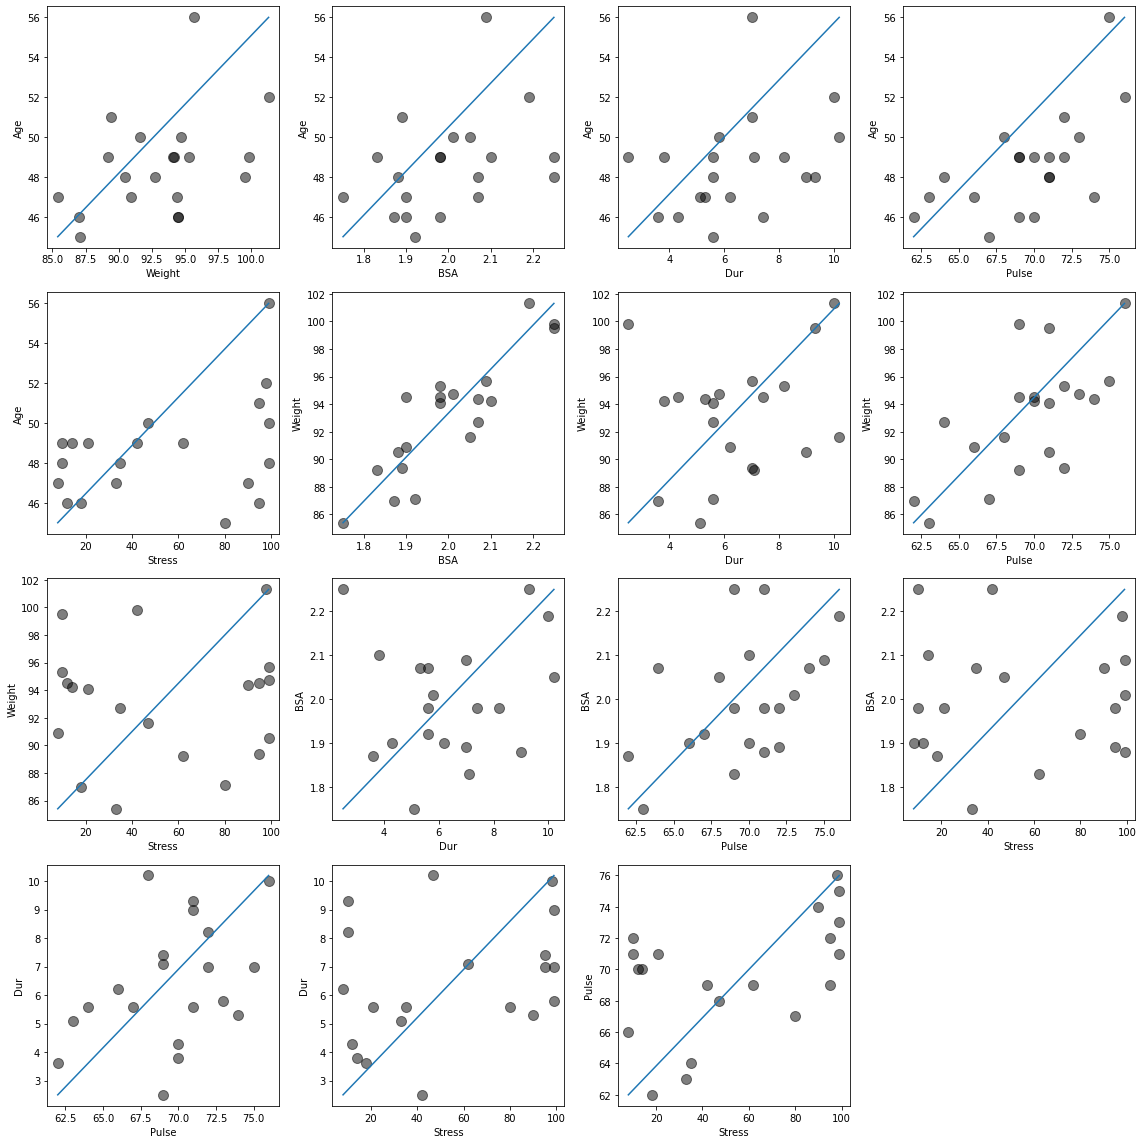

In [2]:
# Read data
data = pd.read_csv("Data/bloodpress.txt", delim_whitespace=True)

var_names = [var_name for var_name in data.columns 
             if var_name not in ("Pt", "BP")] # We are skipping PT (useless) and BP (seperate cell) 
n_var = len(var_names)
var_comb = list(itt.combinations(var_names, 2)) # Make a list of all 2 combinations

# Some plotting layout
ncols = 4 # We want 4 columns
nrows = ceil(len(var_comb)/ncols) # Figure out number of rows 
grid = GridSpec(nrows, ncols) # Setup grid

fig = plt.figure(figsize=(4*ncols, 4*nrows))
for i, pair in enumerate(var_comb): # Loop over the variable combinations
    row, col = divmod(i, ncols)
    ax = fig.add_subplot(grid[row, col]) # Figure out where we are plotting
    yname = pair[0]
    xname = pair[1]
    ydata = data[yname]
    xdata = data[xname]
    ax.scatter(xdata, ydata, c='k', alpha=.5, s=100) # Plot the data
    ax.set_xlabel(xname) # Set the axis labels
    ax.set_ylabel(yname)
    ax.plot([min(xdata), max(xdata)], [min(ydata), max(ydata)]) # Plot a visual aid to the lower left data point and upper right
fig.tight_layout() # Fix layout

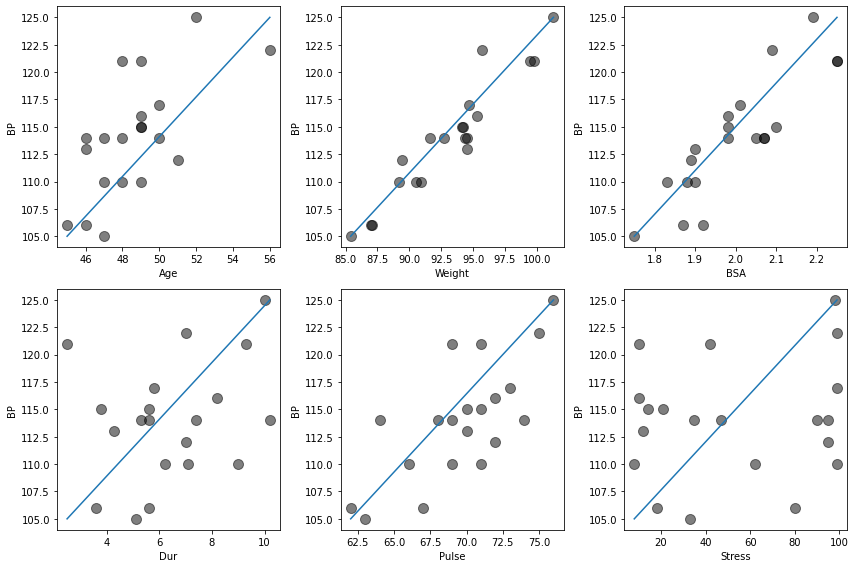

In [3]:
# Now we repeat the process but just for BP

# Some plotting layout
ncols = 3 # We want 4 columns
nrows = ceil(len(var_names)/ncols) # Figure out number of rows 
grid = GridSpec(nrows, ncols) # Setup grid

fig = plt.figure(figsize=(4*ncols, 4*nrows))
bp_comb = list(itt.product(["BP"], var_names)) # Combine BP with far names

for i, pair in enumerate(bp_comb): # Loop over the variable combinations
    row, col = divmod(i, ncols)
    ax = fig.add_subplot(grid[row, col]) # Figure out where we are plotting
    yname = pair[0]
    xname = pair[1]
    ydata = data[yname]
    xdata = data[xname]
    ax.scatter(xdata, ydata, c='k', alpha=.5, s=100) # Plot the data
    ax.set_xlabel(xname) # Set the axis labels
    ax.set_ylabel(yname)
    ax.plot([min(xdata), max(xdata)], [min(ydata), max(ydata)]) # Plot a visual aid to the lower left data point and upper right
fig.tight_layout() # Fix layout

**Your answer to 7.1(a):** 
- BP with Age,
- BP with Weight,
- BP with BSA, 
- BP with Pulse, 
- Pulse with Age, 
- Pulse with Weight, 
- Weight with BSA

**(b)** To quantitatively investigate possible correlations, we can calculate
the [Pearson correlation
coefficient](https://en.wikipedia.org/wiki/Pearson_correlation_coefficient) ($\rho_{X,Y}$),
\begin{equation*}
\rho_{X,Y} = \frac{\mathrm{cov}(X,Y)}{S_X S_Y},
\end{equation*}
where $\mathrm{cov}(X,Y)$ is the covariance between the variables $X$ and $Y$, and
$S_i$ is the estimated standard deviation for variable $i$.
In `scipy`, this coefficient is a part of the [`stats` package](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.pearsonr.html) 
and can be imported by:
```Python
from scipy.stats import pearsonr
```
This function returns two values:
 * The correlation coefficient itself. It is close to $1$ for positively correlated distributions
   and close to $-1$ for negatively correlated distributions.
 * A "p-value" which (to quote the documentation of `scipy`):

> roughly indicates the probability of an uncorrelated system
> producing datasets that have a Pearson correlation at least as extreme
> as the one computed from these datasets.



Calculate this coefficient for each of the pairs of variables and
use it to judge if the variables
are correlated.

In [4]:
from scipy.stats import pearsonr

all_comb = var_comb+bp_comb # Combine the two lists
for pair in all_comb:
        # Get the data
        yname = pair[0]
        xname = pair[1]
        ydata = data[yname]
        xdata = data[xname]
        # Calculate the pearson coefficient
        corr, p = pearsonr(x=xdata, y=ydata)
        if abs(corr) >= .6: # If the coefficient is greater than 0.6 or smaller than -0.6 we want to know it
            print(f"{xname} and {yname}; {corr}")

Pulse and Age; 0.6187642575142913
BSA and Weight; 0.8753048148015139
Pulse and Weight; 0.6593398655323165
Age and BP; 0.6590929823655836
Weight and BP; 0.950067651704124
BSA and BP; 0.8658788655448347
Pulse and BP; 0.7214131556549317


In [5]:
# Pandas also has a convenience function for this
if "BP" not in var_names:
    var_names += ["BP"] # Add BP to the variable names
corr = data[var_names].corr()
corr.style.background_gradient(cmap='viridis')

,Age,Weight,BSA,Dur,Pulse,Stress,BP
Age,1.000000,0.407349,0.378455,0.343792,0.618764,0.368224,0.659093
Weight,0.407349,1.000000,0.875305,0.200650,0.659340,0.034355,0.950068
BSA,0.378455,0.875305,1.000000,0.130540,0.464819,0.018446,0.865879
Dur,0.343792,0.200650,0.130540,1.000000,0.401514,0.311640,0.292834
Pulse,0.618764,0.659340,0.464819,0.401514,1.000000,0.506310,0.721413
Stress,0.368224,0.034355,0.018446,0.311640,0.506310,1.000000,0.163901
BP,0.659093,0.950068,0.865879,0.292834,0.721413,0.163901,1.000000


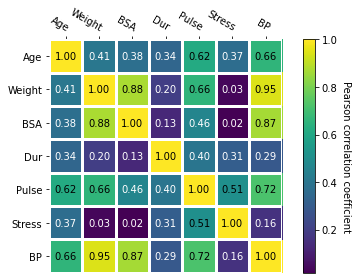

In [6]:
# Optional, make a prettier heat map of all the pearson coefficients

# Fill a 2D array with all values
corr = data[var_names].corr() # Pandas has a convenience functions to get all the correlations
data_array = corr.to_numpy() # Cast to numpy array for easy plotting

# Plotting
ax = plt.gca()

# Make heatmap
im = ax.imshow(data_array, aspect="equal")

#Add colorbar
cbar = ax.figure.colorbar(im , ax=ax)
cbarlabel = "Pearson correlation coefficient"
cbar.ax.set_ylabel(cbarlabel, rotation=-90, va="bottom")

# We want to show all ticks ...
ax.set_xticks(np.arange(data_array.shape[1]))
ax.set_yticks(np.arange(data_array.shape[0]))
# ... and label them with the respective corr entries .
ax.set_xticklabels(corr) 
ax.set_yticklabels(corr)

# Let the horizontal axes labeling appear on top.
ax.tick_params(top=True, bottom =False, labeltop=True, labelbottom=False)

# Rotate the tick labels and set their alignment .
plt.setp(ax.get_xticklabels(), rotation=-30, ha="right", rotation_mode="anchor")

# Turn spines off and create white grid.
for edge, spine in ax.spines.items():
    spine.set_visible(False)
ax.set_xticks(np.arange(data_array.shape[1]+1)-.5, minor=True)
ax.set_yticks(np.arange(data_array.shape[0]+1)-.5, minor=True)
ax.grid(which="minor", color="w", linestyle ='-', linewidth =3)
ax.tick_params(which="minor", bottom=False, left=False)

# Add labels
for i, row in enumerate(data_array):
    for j, val in enumerate(row):
        # Set text color, depending on value
        if val < 0.5:
            c = "white"
        else:
            c = "black"
        im.axes.text(j, i, f"{val:.2f}",
                     horizontalalignment="center",
                     verticalalignment ="center",
                     color=c)
plt.tight_layout()

**Your answer to 7.1(b):** Same answer as we determined by *hand*.

**(c)** Create a linear model in which you predict the blood pressure ($y$) from
all 6 available variables (Age, Weight, BSA, DUR, Pulse, and Stress).
For this, make use of the `statsmodels` package and the
ordinary least squares (OLS) estimation. (For an example of the usage, see: [here](https://www.statsmodels.org/dev/examples/notebooks/generated/ols.html))
Here, it might be beneficial to scale your variables so that they have a
mean of $0$ and a variance of $1$. This can, for instance, be done using the `sklearn` package. (Please see the [`scale` method](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.scale.html))
Compare the results of the fitting using both scaled and non-scaled variables.

**Note:** One motivation for using the `statsmodels` package is that it will do
some additional statistics in connection with the fitting. To print out
the results of a fitting, we can do the following:
```Python
import statsmodels.api as sm
# load X data...
# load y data...
# Do fitting:
model = sm.OLS(y, X).fit()
# Print out statistics:
print(model.summary())
```
Some information on the interpretation of this summary can be found [here](https://blog.datarobot.com/ordinary-least-squares-in-python)

                                 OLS Regression Results                                
Dep. Variable:                     BP   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          9.558e+04
Date:                Thu, 25 Feb 2021   Prob (F-statistic):                    1.86e-31
Time:                        11:25:02   Log-Likelihood:                         -16.919
No. Observations:                  20   AIC:                                      45.84
Df Residuals:                      14   BIC:                                      51.81
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

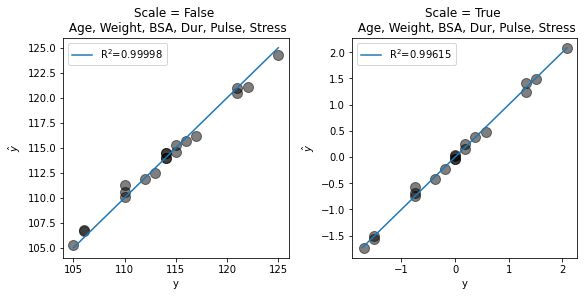

In [7]:
def linear_fit(data, yvar, xvars, scale_data=False, add_constant=False,
               axi=None):
    """Do a linear fitting, based on the OLS example of statsmodels.

    Parameters
    ----------
    data : pandas data frame
        The raw data to use in the blotting.
    yvar : string
        The label used to select the y-variable.
    xvars : list of strings
        The label(s) used to select the x-variables.
    scale_data : boolean, optional
        If True, the data will be scaled to have a mean of 0 and
        a variance of 1.
    add_constant : boolean, optional
        If True, we will add a constant (intercept) to the x-data.
    axi : matplotlib.axis, optional
        If given, we will plot in this axis. Otherwise a new axis
        will be created.

    """
    import statsmodels.api as sm
    from sklearn.preprocessing import scale
    X = data[xvars]
    y = data[yvar]
    if scale_data:
        X = scale(X)
        y = scale(y)
    if add_constant:
        X = sm.add_constant(X)
    model = sm.OLS(y, X).fit()
    yre = model.predict(X)
    print(model.summary())
    # Plot predicted y vs the real y to visualize the results:
    miny = min(min(y), min(yre))
    maxy = max(max(y), max(yre))
    lines = [
        {
            'x': [miny, maxy],
            'y': [miny, maxy],
            'label': rf'$R^2$ = {model.rsquared:6.4f}',
        }
    ]
    ax = axi
    ax.scatter(y, yre, c='k', alpha=.5, s=100) # Plot the data
    ax.set_xlabel("y") # Set the axis labels
    ax.set_ylabel(r"$\hat{y}$")
    ax.set_title(f"Scale = {scale_data} \n {', '.join(xvars)}")
    ax.plot([miny, maxy], [miny, maxy], label=rf"R$^2$={model.rsquared:.5f}") # Plot a visual aid to the lower left data point and upper right
    ax.legend()

fig, axs = plt.subplots(constrained_layout=True, ncols=2, figsize=(8,4))
for axi, scale in zip(axs, [False, True]):
    linear_fit(data, yvar="BP", xvars=[i for i in var_names if i != "BP"],
              scale_data=scale, axi=axi)


**Your answer to 7.1(c):**

In both cases (with or without scaling) the least-squares solution is found successfully. Results of the scaled data is shown in this table:

|**Variable**|**Coefficient**|**P value**, *P* $>|t|$|
|:-----------|:-------------:|:---------------------:|
| Age        |        0.3239 |                 0.000 |
| Weight     |        0.7673 |                 0.000 |
| BSA        |        0.0949 |                 0.026 |
| Dur        |        0.0270 |                 0.165 |
| Pulse      |       -0.0592 |                 0.111 |
| Stress     |        0.0381 |                 0.112 |

| |
|:---|
|**Table 1:** Coefficients when fitting with age, weight, body surface area, duration, heart rate and stress. The P value tests the null-hypothesis that the coefficient is zero. If this is less than the confidence level (default: $0.05$) we expect the coefficient to be different from zero, and that there is a statistically significant relationship between the variable and the response.|

These results indicate that the age, weight and body surface area are the most
important variables. However, since we have seen that the body surface area is correlated
with the weight, we expect that this variable can be removed from the fitting (as we will
do in the next step).

In the case without scaling the following
warning is issued by `statsmodels`:

>The condition number is large, 2.23e+03. This might indicate that there are
>strong multicollinearity or other numerical problems.

Warnings of this kind typically indicate two things (as the warning says):

**i)** That some of the `x`-variables are correlated. One should then
investigate what variables are correlated and reduce the number of
variables so that our set of `x`-variables are uncorrelated.

**ii)** That there are numerical issues related to finding the least squares
solutions. In general, it is hard to identify the root cause of this, but in
many cases the situation can be improved by scaling the variables so that their
numerical values are of the same order.
This is important if our variables have very different units or
meanings.

**(d)** Your results so far should indicate that some of the variables
are correlated. Create a new model where you remove variables
that are correlated. That is, if a variable, say $u$, is correlated with
another variable, say $v$, pick either $u$ or $v$ for your new model.

Fit your new model to the blood pressure data
and compare it with the model where you included all variables.
How many variables can you remove and still get a good model?
Which variables seem
to be more important for predicting if a person will have high blood pressure?

                                 OLS Regression Results                                
Dep. Variable:                     BP   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          9.558e+04
Date:                Thu, 25 Feb 2021   Prob (F-statistic):                    1.86e-31
Time:                        11:25:03   Log-Likelihood:                         -16.919
No. Observations:                  20   AIC:                                      45.84
Df Residuals:                      14   BIC:                                      51.81
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

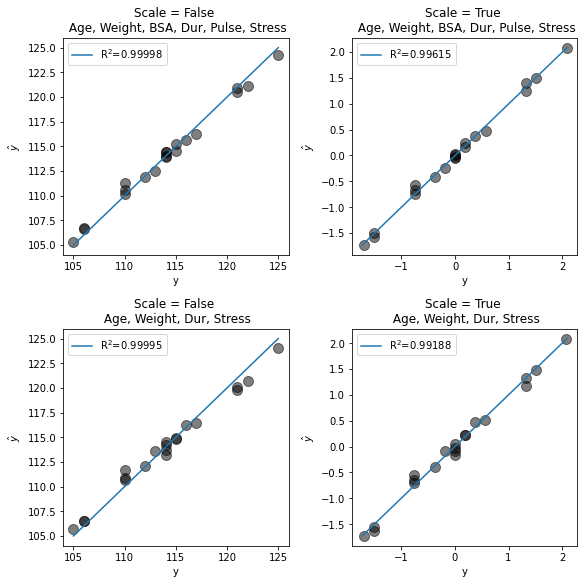

In [8]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(8,8), constrained_layout=True)
old_exc = ["BP"] # First we only excluded BP from xvars
new_exc = ["BP", "Pulse", "BSA"] # We now exclude Pulse and BSA as it is correlated with weight
for axi, (exc, scale) in zip( #Loop over all items at the same time
                             axs.flatten(), # Flattend list of the 2x2 axs matrix
                             itt.product([old_exc, new_exc], [False, True]) # Make a list of the product of the two lists ([a,b],[c,d])=>[(a,c), (a,d), (b,c), (b,d)]
                             ):
    linear_fit(data, yvar="BP", xvars=[i for i in var_names if i not in exc],
               scale_data=scale, axi=axi)

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.434
Model:                            OLS   Adj. R-squared (uncentered):              0.405
Method:                 Least Squares   F-statistic:                              14.59
Date:                Thu, 25 Feb 2021   Prob (F-statistic):                     0.00116
Time:                        11:25:03   Log-Likelihood:                         -22.680
No. Observations:                  20   AIC:                                      47.36
Df Residuals:                      19   BIC:                                      48.36
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

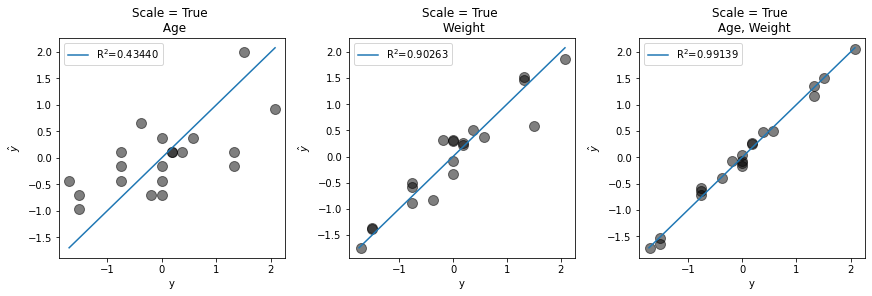

In [9]:
# Now we just use the most important ones
fig, axs = plt.subplots(ncols=3, figsize=(12,4), constrained_layout=True)
age = ["Age"] # First we only excluded BP from xvars
weight = ["Weight"] # We now exclude Pulse and BSA as it is correlated with weight
both = age+weight
for axi, inc  in zip( #Loop over all items at the same time
                             axs,
                             [age, weight, both]
                             ):
    linear_fit(data,
               yvar="BP",
               xvars=[i for i in var_names if i in inc],
               scale_data=True,
               axi=axi)

**Your answer to 7.1(d):** We have removed:
 - The body surface area as it is correlated with the weight.
 - The heart rate as it is also correlated with the weight.
 
This leaves four
variables: age, weight, duration and stress, and the results of the fitting
can be found in the figure above.

The results from the fitting (the coefficients, see table 2)
indicates that age and weight are more important than the other variables.


|**Variable**|**Coefficient**|**P value**, *P* $>|t|$|
|:-----------|:-------------:|:---------------------:|
| Age        |        0.3149 |                 0.000 |
| Weight     |        0.8181 |                 0.000 |
| Dur        |        0.0158 |                 0.532 |
| Stress     |        0.0149 |                 0.560 |

| |
|:---|
|**Table 2:** Coefficients when fitting with age, weight, duration, and stress. The P value tests the null-hypothesis that the coefficient is zero. If this is less than the confidence level (default: $0.05$) we expect the coefficient to be different from zero, and that there is a statistically significant relationship between the variable and the response.|

Thus, we can try to make a new model where we use just two variables: age and weight. As shown above,
these results show that we can largely predict the blood pressure using the age and weight, or just the
weight alone.

**(e) (Optional exercise)** One strategy to assess the quality of a model is to split the raw data
into a **training set** and a **test set**. Then the **training set**
is used to fit the data and the **test set** is used to test the quality of
the model.

Consider a data set containing $n$ samples. If the data set is
relatively small, we can use the "Leave-one-out cross-validation (LOOCV)"
approach. Here, we pick one sample, say measurement number $j$, which we
keep out of the fitting and we fit the model using the $n-1$ other points.
Now, we can *predict* the value of measurement $j$ using the fitted model,
let us call the predicted value $\tilde{y}_j$. The difference between the predicted
value from the model and the measured value $y_j$ can then be taken as a measure
of the error,
\begin{equation*}
r_j = y_{j} - \tilde{y}_j,
\end{equation*}
where $r_j$ is the so-called predicted residual.
There is nothing special about picking point $j$, and we can try all possibilities
of leaving one point out, and refitting the model using the remaining $n-1$
measurements. After doing this for all possibilities, we have fitted the model
$n$ times and the mean squared error (obtained from the squared
residuals), $\mathrm{MSE}_{\mathrm{CV}}$, can then be used
to estimate the error in the model,
\begin{equation*}
\mathrm{MSE}_{\mathrm{CV}} = \frac{1}{n} \sum_{i=1}^{n} r_i^2 =  \frac{1}{n} \sum_{i=1}^{n} (y_i - \tilde{y}_i)^2,
\end{equation*}
where $y_i$ is the measured $y$ in experiment $i$, and $\tilde{y}_i$ is the
predicted $y$, using a model which was fitted using all point *except* $y_i$.

*(i)* Implement the LOOCV approach and calculate the mean squared error for a linear fit
using all variables, and for a linear fit using just the weight and age as
variables.

**Hint:** The splitting into training and test sets can be done with the method `LeaveOneOut`
from `sklearn`:
```Python
from sklearn.model_selection import LeaveOneOut
# load X data...
# load y data...
loo = LeaveOneOut()
for train_index, test_index in loo.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    # Do fitting using X_train and y_train.
    # Calculate error using y_test and predicted y from the model.
```

*(ii)* One can show that for polynomial fitting, the mean squared error can
be obtained in a simpler way,
\begin{equation*}
\mathrm{MSE}_{\mathrm{CV}} = \frac{1}{n}\sum_{i=1}^{n} (y_i - \tilde{y}_i)^2 =
\frac{1}{n}\sum_{i=1}^{m} \left(\frac{y_i - \hat{y}_i}{1 - h_{ii}} \right)^2,
\end{equation*}
where the $\hat{y}_i$'s are predicted values using the
model fitted with *all data points*,
and $h_{ii}$ is the $i$'th diagonal element of the
$\mathbf{H}$ matrix (the projection matrix,
see Eq. (2) in exercise 2),
\begin{equation}
\mathbf{H} =
\mathbf{X} 
\left( 
  \mathbf{X}^\mathrm{T} \mathbf{X}
\right)^{-1}
\mathbf{X}^\mathrm{T}
\end{equation}
Using the equations given above, recalculate $\mathrm{MSE}_{\mathrm{CV}}$ and compare
with your previous answers.
Note the difference between $\hat{y}_i$ and $\tilde{y}_i$, and the
fact that we actually don't have to do the
refitting(!) in order to obtain the $\mathrm{MSE}_{\mathrm{CV}}$.

In [10]:
# (Optional) Your code here
import statsmodels.api as sm
from sklearn.preprocessing import scale
def loo_fit(data, yvar, xvars, scale_data=False, add_constant=False,
               axi=None):
    """Do a linear fitting, based on the OLS example of statsmodels.

    Parameters
    ----------
    data : pandas data frame
        The raw data to use in the blotting.
    yvar : string
        The label used to select the y-variable.
    xvars : list of strings
        The label(s) used to select the x-variables.
    scale_data : boolean, optional
        If True, the data will be scaled to have a mean of 0 and
        a variance of 1.
    add_constant : boolean, optional
        If True, we will add a constant (intercept) to the x-data.
    axi : matplotlib.axis, optional
        If given, we will plot in this axis. Otherwise a new axis
        will be created.

    """
    import statsmodels.api as sm
    from sklearn.preprocessing import scale
    from sklearn.model_selection import LeaveOneOut
    loo = LeaveOneOut()
    X = data[xvars]
    y = data[yvar]
    err = []
    if scale_data:
        X = scale(X)
        y = scale(y)
    if add_constant:
        X = sm.add_constant(X)
    for train_index, test_index in loo.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        model = sm.OLS(y_train, X_train).fit()
        yre = model.predict(X_test)
        er = (y_test-yre)**2
        err.append(er)
    print(", ".join(xvars)+f": {np.average(err):.3f}")
var_all = [i for i in var_names if i not in ["BP"]]
var_wa = ["Weight", "Age"]
print("LOO")
for var in [var_all, var_wa]:
        loo_fit(data, yvar="BP", xvars=var,
              scale_data=True,)
print("Matrix")
for var in [var_all, var_wa]:
    X = data[var] # Select xvar
    y = data['BP'] # Select yvar
    X = scale(X)
    y = scale(y)
    y_hat = sm.OLS(y, X).fit().predict(X) # Calculate yhat
    H = np.dot(np.dot(X, np.linalg.inv(np.dot(X.T, X))), X.T)
    h = np.diagonal(H) # Take diagonal of H
    mse = np.average(((y - y_hat)/(1.0 - h))**2)
    print(", ".join(var)+f": {mse:.3f}")

LOO
Age, Weight, BSA, Dur, Pulse, Stress: 0.008
Weight, Age: 0.010
Matrix
Age, Weight, BSA, Dur, Pulse, Stress: 0.008
Weight, Age: 0.010


**(Optional) Your answer to 7.1(e):** The error from leaving one out is $0.008$ and $0.01$, respectively, for the two cases.
We see that the error is not increased a lot when we reduce the number of variables significantly.
Using the alternative formula, the errors are still $0.008$ and $0.01$.


**Exercise 7.2**

In this exercise, we will investigate a data set using PCA and
our aim is to classify objects.
The data set is contained in the file
[data_exercise7.txt](Data/data_exercise7.txt) ('Data/data_exercise7.txt')
where you will find columns as described in table 3.

|   | Column | Description                       |    Unit |   |
|---|:-------|:----------------------------------|--------:|---|
|   | $x$    | Values of a measured quantity $x$ | Unknown |   |
|   | $y$    | Values of a measured quantity $y$ | Unknown |   |
|   | class  | Classification of objects         |     --- |   |

| |
|:---|
|**Table 3:** *Data columns present in the file [data_exercise7.txt](Data/data_exercise7.txt)*|

Here, we have done a series of measurements of the variables
$x$ and $y$ for some objects, and we have labeled these objects as
belonging to one of two possible classes: "foo" or "bar".
Your task is now to investigate if you can separate
data points into these two classes, by performing a principal component analysis.

**(a)** As stated above, we are attempting to separate the data into two
classes. Should you include the labels (i.e. the "class" column)
in the data matrix you will run PCA on?

**Your answer to 7.2(a):** The labels should **not** be included. If we include them, we are creating
principal components that are using the label as a variable. This means that we assume that
the label is known for new objects. I.e. there is then no need to predict the class as we
already know it!


**(b)** Begin by plotting the raw data.
Below you will find some Python
code to get you started:

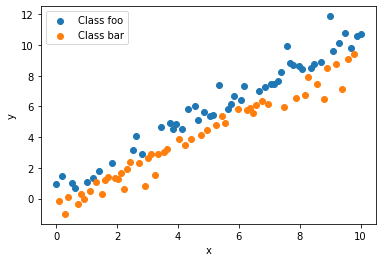

In [11]:
# Needed to import matplotlib and generate plot in the same cell
%matplotlib inline
from matplotlib import pyplot as plt # Plotting
import numpy as np # Matrix operations
import pandas as pd # Reading the data set
from sklearn.preprocessing import scale # Scaling (if needed )
from sklearn.decomposition import PCA # Performing PCA
# Load data:
data = pd.read_csv('Data/data_exercise7.txt', delim_whitespace =True)
# Extract the two classes for plotting :
class1 = data[data['class'] == 'foo']
class2 = data[data['class'] == 'bar']
# We can plot the raw data as follows :
# Note: Here you could style the plot to your liking .
# Adding x- labels and y- labels is , for instance , a good idea.
plt.scatter(class1['x'], class1['y'], label='Class foo')
plt.scatter(class2['x'], class2['y'], label='Class bar')
plt.xlabel('x')
plt.ylabel('y')
plt.legend();

**(c)** Run the principal component analysis. Should you scale the data in this case?
Below you will find some Python
code to get you started:

In [12]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
plt.style.use('seaborn-talk')
# Load data:
data = pd.read_csv('Data/data_exercise7.txt', delim_whitespace =True)
variables = ['x','y'] # Insert the variables you will use here
X = data[variables]
# Uncomment the following lines in order to scale the data:
scaler = StandardScaler() # Initialise the scaler
scaler.fit(X) # "fit" the scaler with the X data
X = scaler.transform(X) # Transform X data with the fit
# To run PCA:
pca = PCA()
scores = pca.fit_transform(X)

**Your answer to 7.2(c):** In this case, we scale the data. Here, the units for $x$ and $y$ is not given,
and to be on the safe side, we scale the data.

**(d)** The `pca` object defined above contains the
results of the principal component analysis.

*(i)* How many principal components were
used here? Hint: Inspect `pca.n_components_`

*(ii)* Plot the explained variance by these components.
Hint: Inspect `pca.explained_variance_ratio_`

PCA components: 2


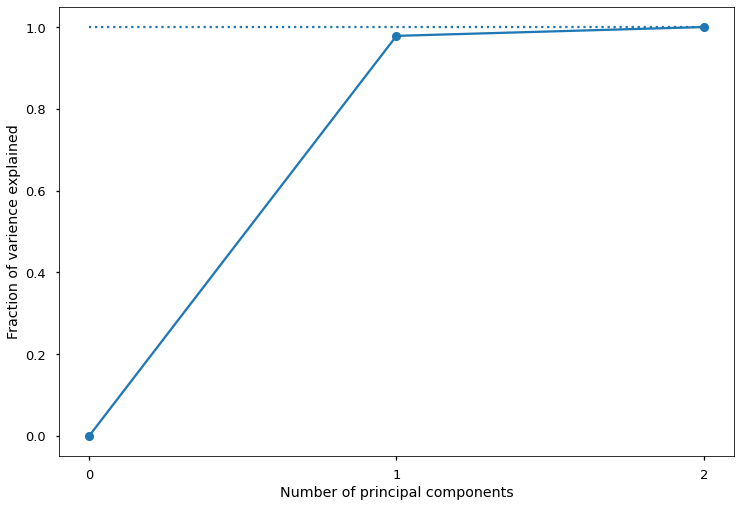

In [13]:
print(f"PCA components: {pca.n_components_}")
x = list(range(pca.n_components_+1))
y = [0]
for var in pca.explained_variance_ratio_:
    y.append(y[-1]+var)
plt.plot(x, y, "-o")
plt.hlines(1, xmin=0, xmax=2, linestyle='dotted')
plt.xticks(x, labels=[str(i) for i in x])
plt.xlabel("Number of principal components")
plt.ylabel("Fraction of varience explained");
plt.tight_layout()

**Your answer to 7.2(d):** After performing the principal component analysis we find:

*(i)* That we have two principal components.

*(ii)* That the explained variance is given in the figure above.


**(e)** The principal components themselves are contained as row vectors in
the matrix `pca.components_`:

*(i)* Obtain the principal component vectors.

*(ii)* Verify that they are normalized (Hint: dot products can be done with `np.dot`)

*(iii)* Verify that they are orthogonal to each other.

*(iv)* Plot them together with the raw data.
Do they point in the directions you would expect?


PC 1: [0.70710678 0.70710678], PC 2: [ 0.70710678 -0.70710678]
1: normalized: True
2: normalized: True
Orthogonal: True


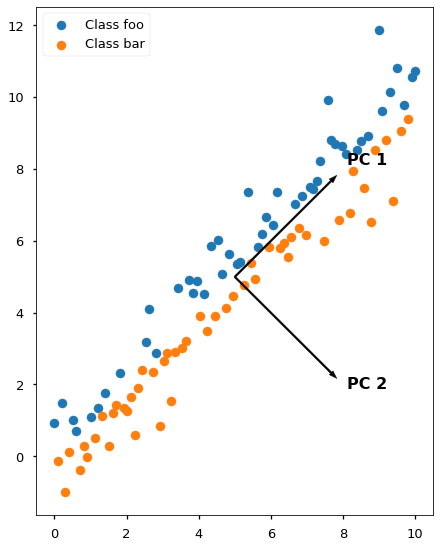

In [14]:
# i
components = pca.components_
print(f"PC 1: {components[0]}, PC 2: {components[1]}")

# ii
for i, comp in enumerate(components):
    prod = np.dot(comp, comp)
    print(f"{i+1}: normalized: {prod==1}")
    
# iii
ort = np.dot(components[0], components[1])
print(f"Orthogonal: {ort==0}")

# iv 
# We have to scale the data to make sense for normalized PC vectors
xdata = data["x"] 
ydata = data["y"]
xclass1 = xdata[data['class'] == 'foo']
yclass1 = ydata[data['class'] == 'foo']
xclass2 = xdata[data['class'] == 'bar']
yclass2 = ydata[data['class'] == 'bar']
fig, ax = plt.subplots(constrained_layout=True, figsize=(6, 7.5))
ax.scatter(xclass1, yclass1, label='Class foo')
ax.scatter(xclass2, yclass2, label='Class bar')
for i, comp in enumerate(components):
    xoffset = np.mean(xdata)
    yoffset = np.mean(ydata)
    scale = 4
    ax.arrow(xoffset, yoffset, 
             comp[0]*scale, comp[1]*scale, 
             width=0.05, length_includes_head=True, color='k')
    ax.text(xoffset+comp[0]*scale*1.1, yoffset+comp[1]*scale*1.1, f"PC {i+1}",
             fontsize=16, weight="bold")
ax.legend();

**Your answer to 7.2(e):** See print statements and figure above.

**(f)** Next, we will investigate the contributions from the
original variables to the principal components. The contribution from
a variable can be found as a column vector in the matrix `pca.components_`.
Make a plot where you show the contributions from each of the original variables to principal components 1 and 2.

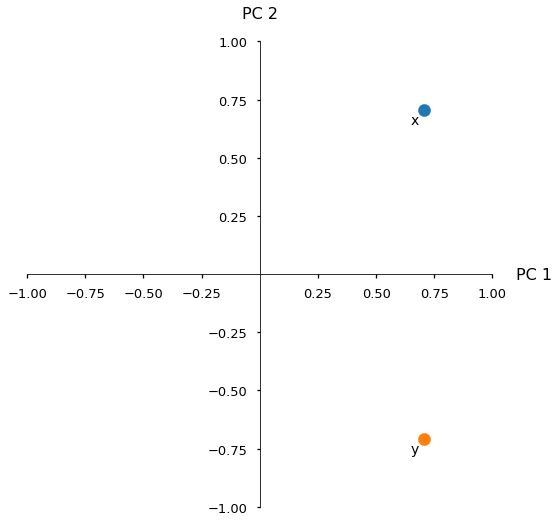

In [15]:
var_cont = pca.components_.T # Do the transpose to swap column to rows

fig, ax = plt.subplots(constrained_layout=True)
ax.set_aspect(1)
offset = 0.06
for var, name in zip(var_cont, ['x','y']):
    ax.scatter(var[0], var[1], label=name, s=150)
    ax.annotate(name, (var[0], var[1]), xytext=(var[0]-offset, var[1]-offset), fontsize=14)
ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)

# The following was taken from https://stackoverflow.com/questions/31556446/how-to-draw-axis-in-the-middle-of-the-figure
# Move left y-axis and bottim x-axis to centre, passing through (0,0)
ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('center')

# Eliminate upper and right axes
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

# Show ticks in the left and lower axes only
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

labels = [-1+i*0.25 for i in range(9) if i !=4]

ax.set_xticks(labels)
ax.set_yticks(labels)
ax.text(x=1.1, y=0, s="PC 1", verticalalignment='center', fontsize=16)
ax.text(x=0, y=1.1, s="PC 2", horizontalalignment='center', fontsize=16);

**(g)** Plot the scores of the data points for
principal components 1 and 2. Color these points by the
class information.

*(i)* Which of the principal components seems more important for
separating between the two classes?

*(ii)*
For the following two points,

* Point 1: $x = 4$, $y=6$
* Point 2: $x = 6$, $y=4$

which class would you
predict?

*(iii)* Can you, based on this plot, make a simple
rule for determining if a point will belong to class "foo"  or class "bar"?
What would your rule be?

*(iv)* Can you "translate" your rule from the principal
component space to the original ($x$, $y$) space? What would the corresponding
rule be in the original variable space?

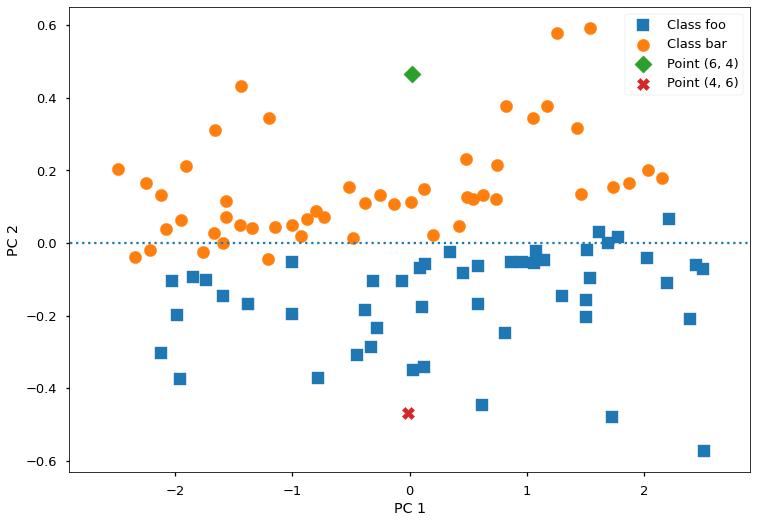

In [16]:
fig, ax = plt.subplots(constrained_layout=True)
xdata = scores.T[0] 
ydata = scores.T[1]
xclass1 = xdata[data['class'] == 'foo']
yclass1 = ydata[data['class'] == 'foo']
xclass2 = xdata[data['class'] == 'bar']
yclass2 = ydata[data['class'] == 'bar']

# i
ax.scatter(xclass1, yclass1, label='Class foo', s=150, marker='s')
ax.scatter(xclass2, yclass2, label='Class bar', s=150)

# ii
points = [(4, 6), (6, 4)]
points = points[::-1] # Leads to better plot colors
apoints = np.asarray(points)
spoints = scaler.transform(apoints)
pscores = pca.transform(spoints)
for point, original, marker  in zip(pscores, points, ["D", "X"]):
    ax.scatter(point[0], point[1], marker=marker, s=150, 
               label=f"Point {original}")
ax.hlines(0, xmin=-3, xmax=3, linestyles='dotted')
ax.set_xlim(-2.9, 2.9)
ax.set_xlabel("PC 1")
ax.set_ylabel("PC 2")
ax.legend();

**Your answer to 7.2(g):** 
 
*(i)* Principal component 2 seems to be more important for separating the two classes.

*(ii)* The two points are shown in the figure above. For point (4, 6) we predict class `foo`
and for point (6, 4) we predict class `bar`.

*(iii)* Based on this plot it seems like objects with a score along PC2 $>0$ belongs to the
class `bar` and objects with a score along PC2 $<0$ belongs to the class `foo`. 
A simple rule would then be:
\begin{equation*} 
\text{class} =
 \begin{cases}
     \text{foo} & \text{if score along PC2} < 0 \\
     \text{bar} & \text{if score along PC2} > 0 \\
  \end{cases}
\end{equation*}
Note that this does not tell us the class if PC2 $= 0$, and that the rule is not perfect
(i.e. some points in this plot will be classified incorrectly).

*(iv)* If we continue with our simple rule, we have that the score for PC2 should be $>0$ for
points belonging to the class `bar`. The score for a given point $(x, y)$ on PC2 is:
\begin{equation*}
0.70710678 x -0.70710678 y .
\end{equation*}
Thus, the score is $>0$ when,
\begin{equation*}
0.70710678 x -0.70710678 y > 0 \implies x > y .
\end{equation*}
Similarly, we
find that points belonging to class `foo` satisfy $x < y$.

Translated, the rule would then be:
\begin{equation*}
\text{class} =
 \begin{cases}
     \text{foo} & \text{if the point lies above the line } x = y \\
     \text{bar} & \text{if the point lies below the line } x = y \\
  \end{cases}
\end{equation*}
Note that this does not tell us the class if $x=y$.

**(h)** PCA belongs to a class of methods that are called latent variable methods.
Latent variable methods typically discover new
variables using the original ones, intending to uncover
"hidden" relations in the data.
In PCA, we find
such latent variables by taking linear combinations of our
original variables, and we make the new latent variables point
in the directions of the largest variance in our data.

Another example of a latent variable method is 
Linear discriminant analysis (LDA).
LDA is similar to PCA, and in LDA we also
find new variables as linear combinations of our original variables.
However, the way we find them is different. In LDA, we do not look for
directions in which the variance is largest, but we rather look for
directions that *separate* the classes best. This means that class information
is needed as input when training the model.

Based on this would you say that PCA is a supervised or unsupervised method?
What about LDA? Is LDA a supervised or unsupervised method?

**Your answer to 7.2(h):** PCA does not require us to give it labeled data ("$y$-values")
so PCA is unsupervised. LDA,
however, requires labeled data ("$y$-values") and is thus a supervised method.